# Business Problem:
In recent years, Netflix has started struggling in finding the insights about their customers that which subscription plan is favourable, and other geographic behaviour of their customers.


<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>

# Research Questions:

1. Which subscription type is the most popular?

2. How does the monthly revenue vary across different subscription types?

3. Which subscription type generates the highest revenue for Netflix?

4. Which devices are most commonly used by Netflix subscribers for content consumption?

5. Are there any noticeable patterns in device preferences based on subscription types or countries?

6. Which countries have the highest number of Netflix users? 

7. How does the distribution of subscription types and device usage differ across countries?

8. What is the age distribution of Netflix users? 

9. Is there any specific age group that constitutes a significant portion of the user base?

10. How does the gender distribution look among Netflix subscribers? 

11. Are there any differences in subscription types, device preferences, or age based on gender?

12. Is there any correlation between the length of time a user has been subscribed to Netflix (Join Date) and their last payment date? 

13. Do users tend to renew their subscriptions consistently?

14. Which country contributes the most to Netflix's revenue based on the monthly revenue data and the number of users in each country?

15. Is there any correlation between the age of users and the subscription type they prefer? 

16. Do different age groups show preferences for specific subscription types?

17. Are there any patterns or trends in user churn based on subscription type, country, or other factors?

18. How does the plan duration vary across different subscription types and countries?

# Analysis initialization date: 2021-06-09

In [1]:
# Import the required libraries:
import os
import sys
import re
import json
import requests
import warnings
warnings.filterwarnings('ignore') # To ignore warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the dataset into dataframe:
df = pd.read_csv('Netflix Userbase.csv')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Exploratory Data Analysis and Data Cleaning: Netflix Data

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [5]:
df.shape

(2500, 10)

In [6]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [8]:
# Convert the Join Date and Last Payment Date to datetime format:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [11]:
# For Catagorical Data:
df.describe(include= "object")

,Subscription Type,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500
unique,3,10,2,4,1
top,Basic,United States,Female,Laptop,1 Month
freq,999,451,1257,636,2500


In [12]:
# To check the catagory of each column:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

Subscription Type
['Basic' 'Premium' 'Standard']
--------------------------------------------------
Country
['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
--------------------------------------------------
Gender
['Male' 'Female']
--------------------------------------------------
Device
['Smartphone' 'Tablet' 'Smart TV' 'Laptop']
--------------------------------------------------
Plan Duration
['1 Month']
--------------------------------------------------


In [13]:
# Check for missing values:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [14]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


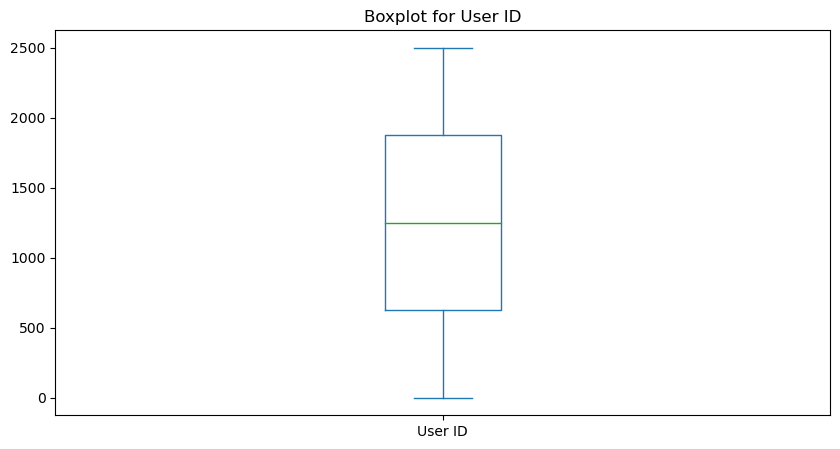

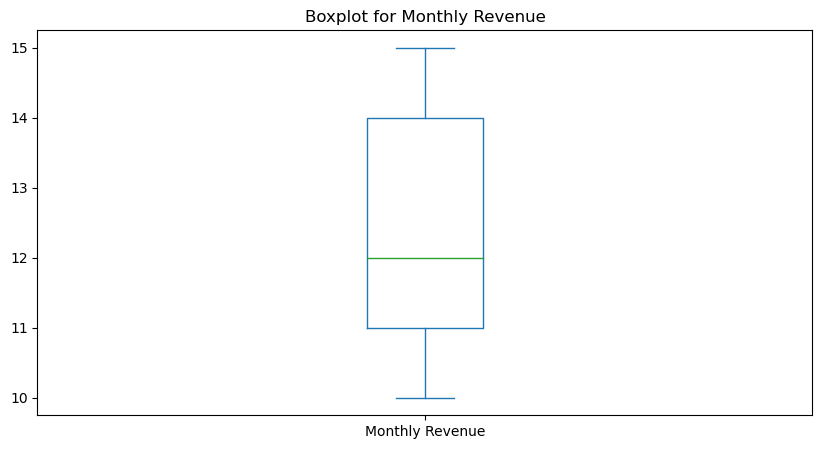

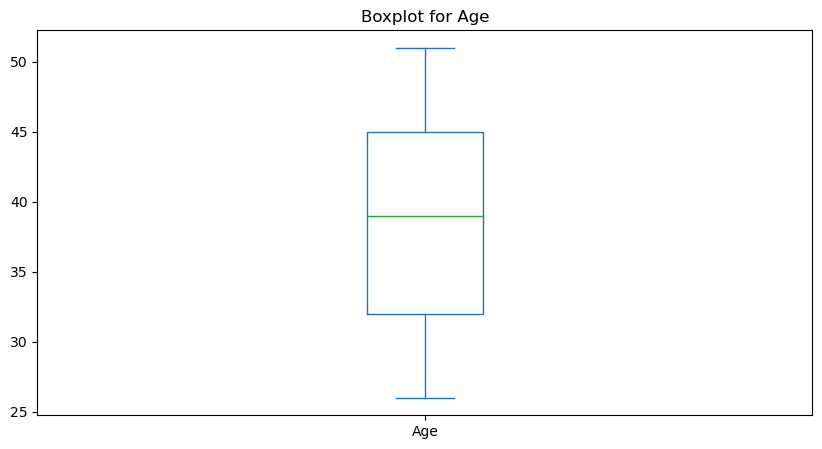

In [15]:
# Check for missing values
for col in df.describe().columns:
    df[[col]].plot(kind="box",figsize=(10,5))
    plt.title(f"Boxplot for {col}")

# Data Analysis and Data Visualization

Text(0, 0.5, 'Number of Users')

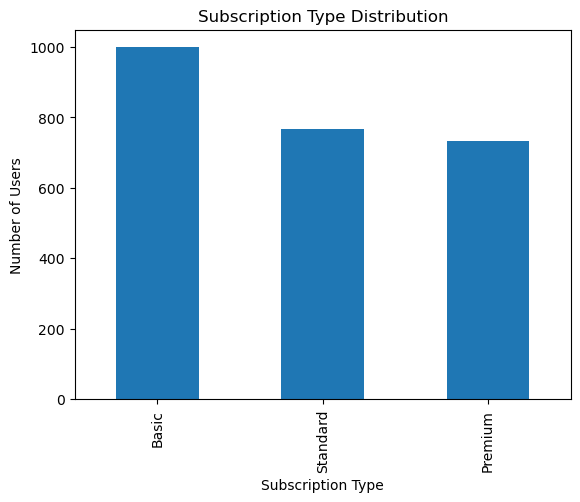

In [16]:
# 1. Which subscription type is the most popular?
subscription_counts = df['Subscription Type'].value_counts()
subscription_counts.plot(kind='bar')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')

Text(0.5, 1.0, 'Monthly Revenue by Subscription Type')

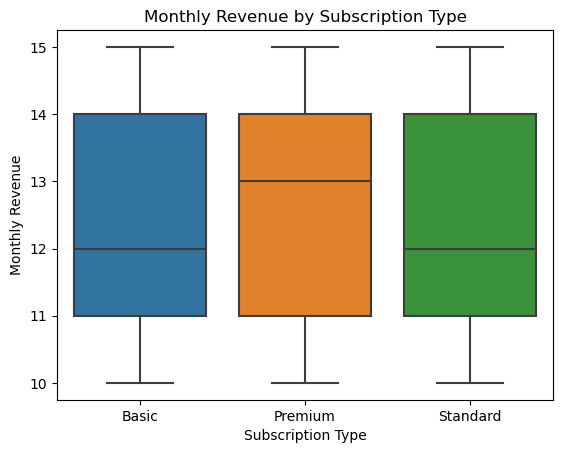

In [17]:
# 2. How does the monthly revenue vary across different subscription types?
sns.boxplot(data=df, x='Subscription Type', y='Monthly Revenue')
plt.title('Monthly Revenue by Subscription Type')


In [18]:
# 3. Which subscription type generates the highest revenue for Netflix?
highest_revenue_subscription = df.groupby('Subscription Type')['Monthly Revenue'].sum().idxmax()
print(f"The subscription type that generates the highest revenue: {highest_revenue_subscription}")

The subscription type that generates the highest revenue: Basic


Text(0, 0.5, 'Number of Users')

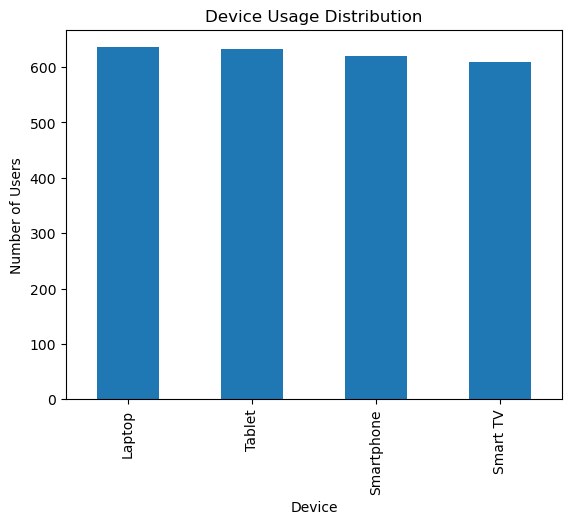

In [19]:
# 4. Which devices are most commonly used by Netflix subscribers for content consumption?
device_counts = df['Device'].value_counts()
device_counts.plot(kind='bar')
plt.title('Device Usage Distribution')
plt.xlabel('Device')
plt.ylabel('Number of Users')

Text(0.5, 1.0, 'Device Preferences by Subscription Type')

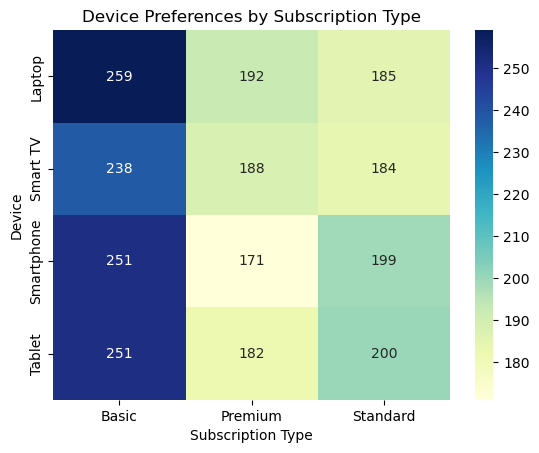

In [20]:
# 5. Are there any noticeable patterns in device preferences based on subscription types or countries?
cross_tab_device = pd.crosstab(df['Device'], df['Subscription Type'])
sns.heatmap(cross_tab_device, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Device Preferences by Subscription Type')

Text(0.5, 1.0, 'Device Preferences by Country')

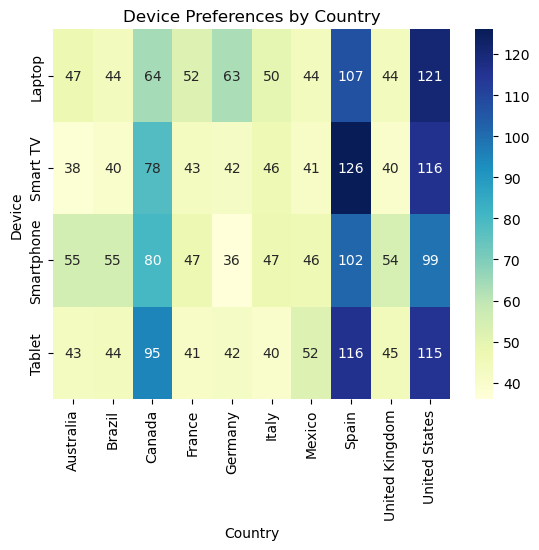

In [21]:
cross_tab_country_device = pd.crosstab(df['Device'], df['Country'])
sns.heatmap(cross_tab_country_device, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Device Preferences by Country')

Text(0, 0.5, 'Number of Users')

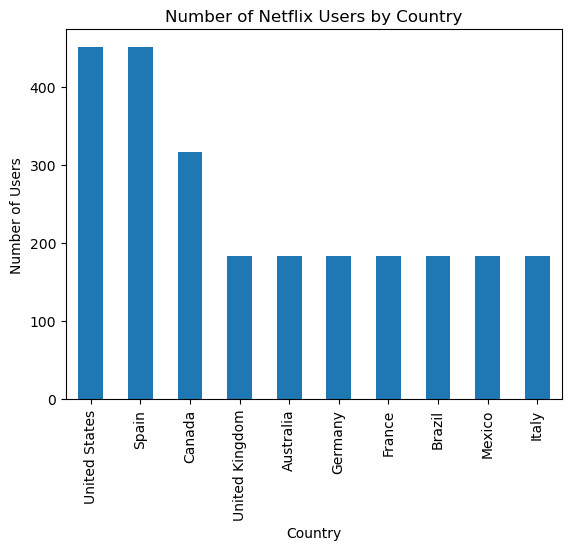

In [22]:
# 6. Which countries have the highest number of Netflix users?
user_counts_by_country = df['Country'].value_counts()
user_counts_by_country.plot(kind='bar')
plt.title('Number of Netflix Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')

Text(0.5, 1.0, 'Subscription Type Distribution by Country')

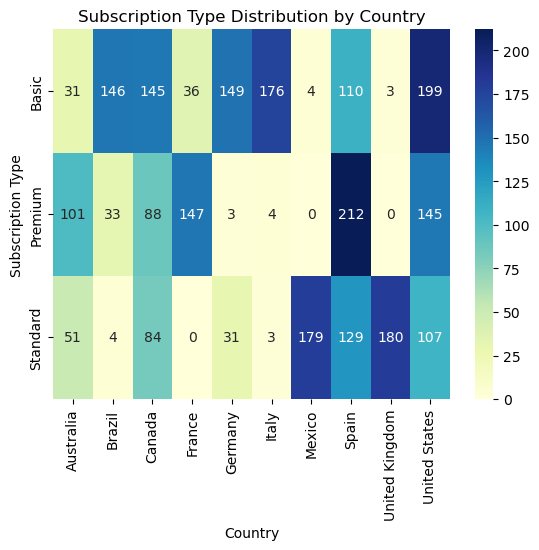

In [23]:
# 7. How does the distribution of subscription types and device usage differ across countries?
cross_tab_subscription_country = pd.crosstab(df['Subscription Type'], df['Country'])
sns.heatmap(cross_tab_subscription_country, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Subscription Type Distribution by Country')

Text(0.5, 1.0, 'Device Usage Distribution by Country')

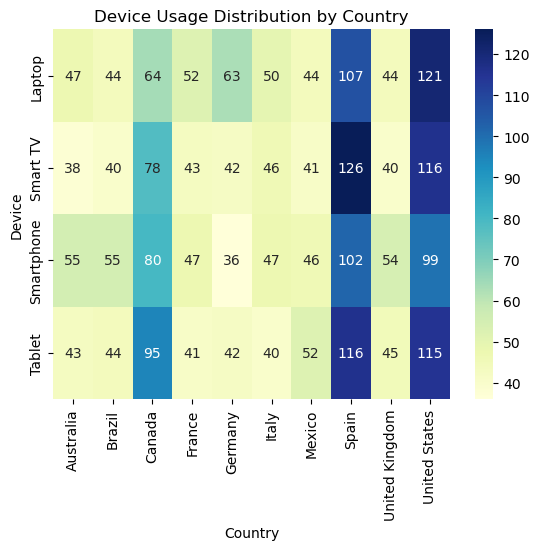

In [24]:
cross_tab_device_country = pd.crosstab(df['Device'], df['Country'])
sns.heatmap(cross_tab_device_country, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Device Usage Distribution by Country')

Text(0, 0.5, 'Number of Users')

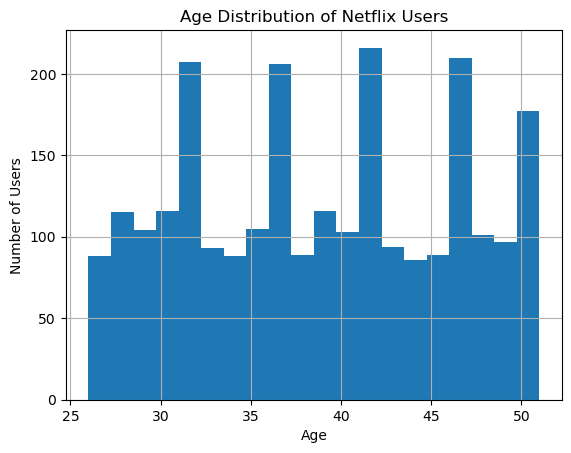

In [25]:
# 8. What is the age distribution of Netflix users?
df['Age'].hist(bins=20)
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')

Text(0, 0.5, 'Number of Users')

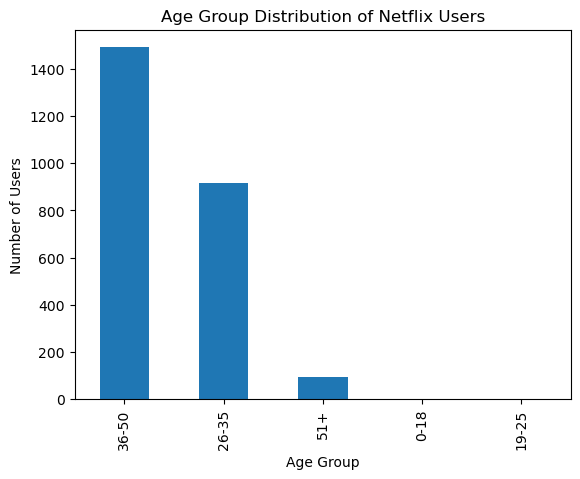

In [26]:
# 9. Is there any specific age group that constitutes a significant portion of the user base?
age_group_counts = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, float('inf')], labels=['0-18', '19-25', '26-35', '36-50', '51+'])
age_group_counts.value_counts().plot(kind='bar')
plt.title('Age Group Distribution of Netflix Users')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')

Text(0, 0.5, 'Number of Users')

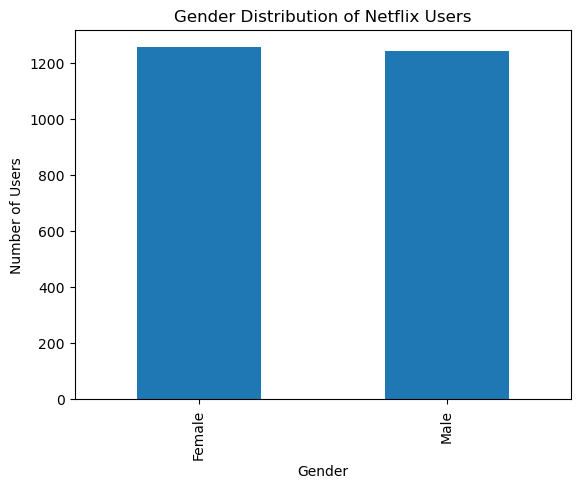

In [27]:
# 10. How does the gender distribution look among Netflix subscribers?
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution of Netflix Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

Text(0.5, 1.0, 'Subscription Type Preferences by Gender')

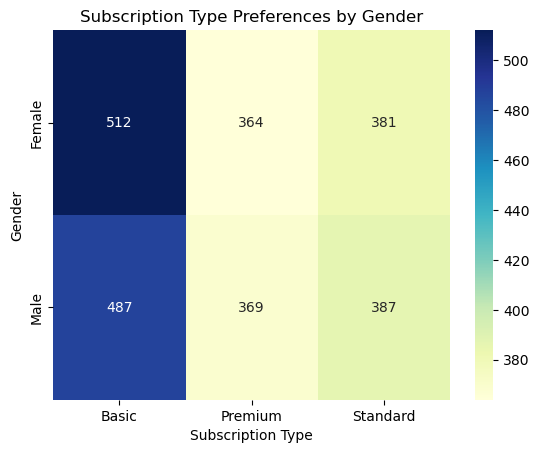

In [28]:
# 11. Are there any differences in subscription types, device preferences, or age based on gender?
gender_cross_tab_subscription = pd.crosstab(df['Gender'], df['Subscription Type'])
sns.heatmap(gender_cross_tab_subscription, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Subscription Type Preferences by Gender')

Text(0.5, 1.0, 'Device Preferences by Gender')

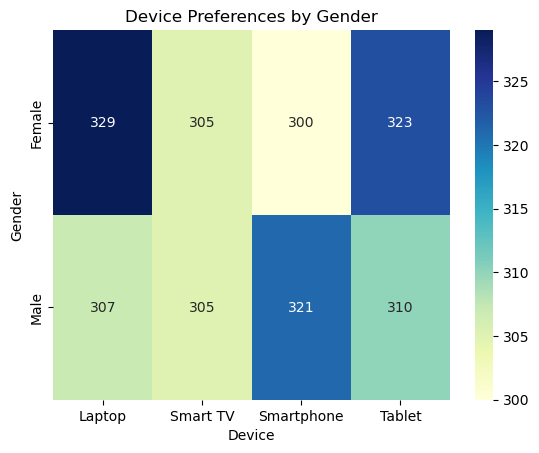

In [29]:
gender_cross_tab_device = pd.crosstab(df['Gender'], df['Device'])
sns.heatmap(gender_cross_tab_device, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Device Preferences by Gender')

Text(0.5, 1.0, 'Age Distribution by Gender')

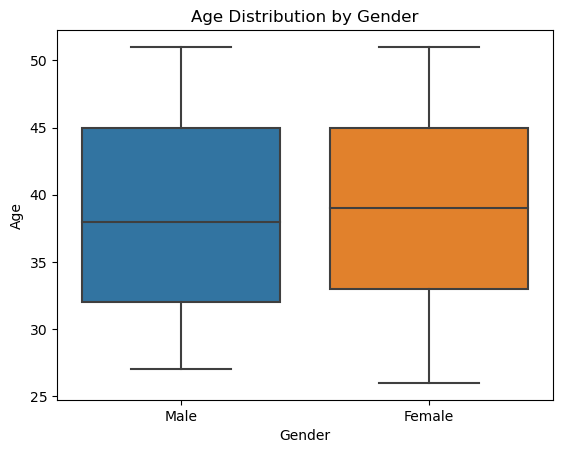

In [30]:
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')

Text(0, 0.5, 'Monthly Revenue')

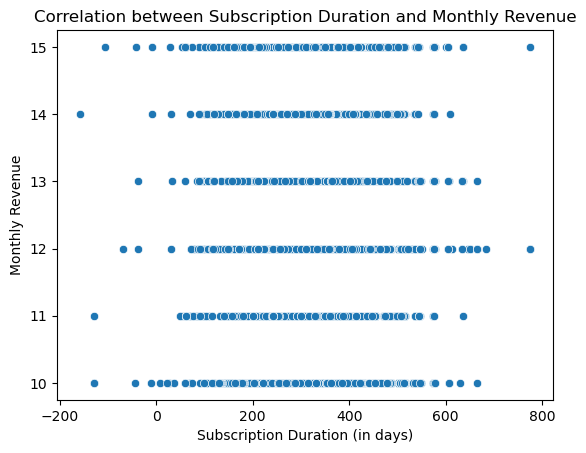

In [31]:
# 12. Is there any correlation between the length of time a user has been subscribed to Netflix (Join Date) and their last payment date?
df['Subscription Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
sns.scatterplot(data=df, x='Subscription Duration', y='Monthly Revenue')
plt.title('Correlation between Subscription Duration and Monthly Revenue')
plt.xlabel('Subscription Duration (in days)')
plt.ylabel('Monthly Revenue')

Text(0, 0.5, 'Number of Renewals')

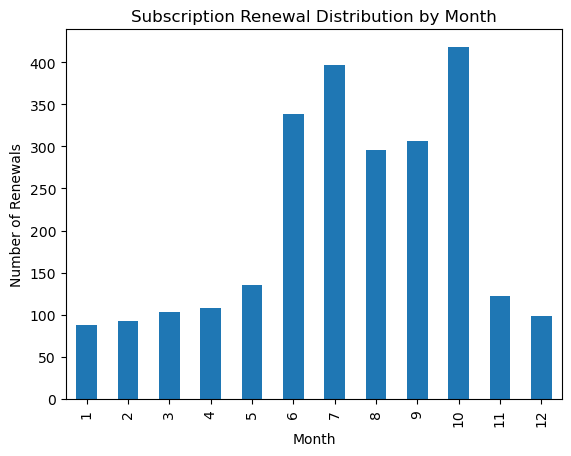

In [32]:
# 13. Do users tend to renew their subscriptions consistently?
renewal_counts = df['Join Date'].dt.month.value_counts().sort_index()
renewal_counts.plot(kind='bar')
plt.title('Subscription Renewal Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Renewals')

In [33]:
# 14. Which country contributes the most to Netflix's revenue based on the monthly revenue data and the number of users in each country?
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum()
highest_revenue_country = revenue_by_country.idxmax()
print("The country that contributes the most to Netflix's revenue: ", highest_revenue_country)

The country that contributes the most to Netflix's revenue:  United States


Text(0.5, 1.0, 'Age Distribution by Subscription Type')

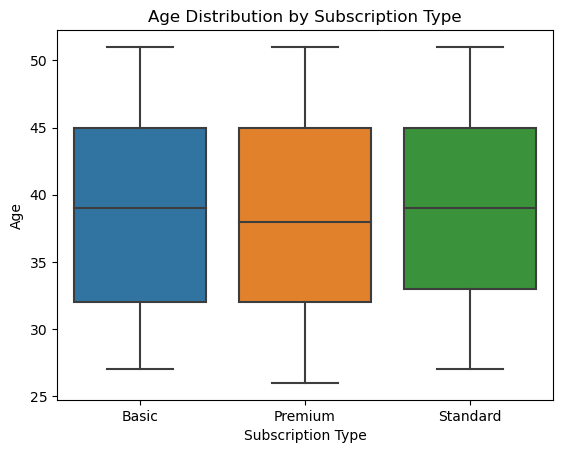

In [34]:
# 15. Is there any correlation between the age of users and the subscription type they prefer?
sns.boxplot(data=df, x='Subscription Type', y='Age')
plt.title('Age Distribution by Subscription Type')

Text(0.5, 1.0, 'Subscription Type Preferences by Age Group')

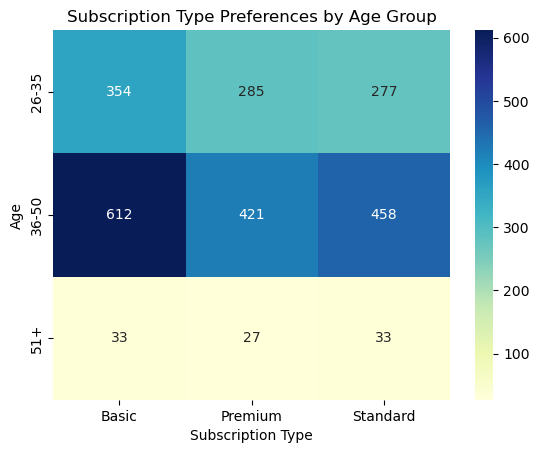

In [35]:
# 16. Do different age groups show preferences for specific subscription types?
cross_tab_subscription_age = pd.crosstab(age_group_counts, df['Subscription Type'])
sns.heatmap(cross_tab_subscription_age, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Subscription Type Preferences by Age Group')

Text(0.5, 1.0, 'Plan Duration Distribution by Subscription Type')

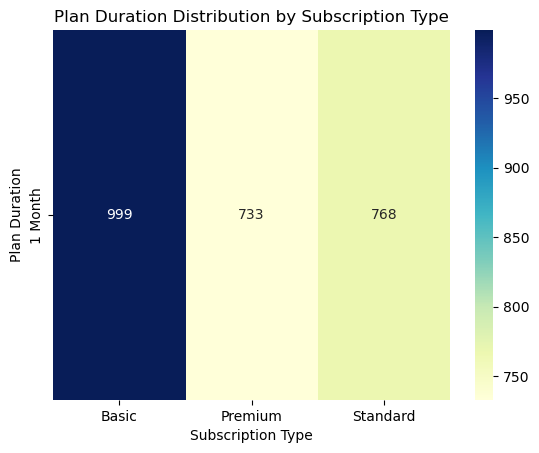

In [36]:
# 18. How does the plan duration vary across different subscription types and countries?
cross_tab_duration_subscription = pd.crosstab(df['Plan Duration'], df['Subscription Type'])
sns.heatmap(cross_tab_duration_subscription, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Plan Duration Distribution by Subscription Type')

Text(0.5, 1.0, 'Plan Duration Distribution by Country')

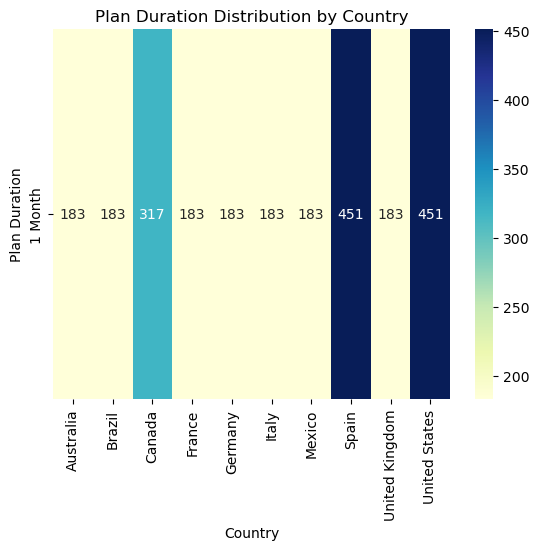

In [37]:
cross_tab_duration_country = pd.crosstab(df['Plan Duration'], df['Country'])
sns.heatmap(cross_tab_duration_country, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Plan Duration Distribution by Country')